# Further Experiments


import matplotlib as plt

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
chin_func = lambda c: 1070*c**(-0.154)+1.7
total_loss = lambda base_flop, time: chin_func(
    (alg_gains**time)*base_flop*(hardware_gains**time)
)
#make lambda function into regular function
def loss_full_function(init_compute, time, alg_gains=alg_gains_train, hardware_gains=hardware_gains, investment_growth=1):
    return chin_func(
        (alg_gains**time)*init_compute*(investment_growth**time)* (hardware_gains**time)
    )


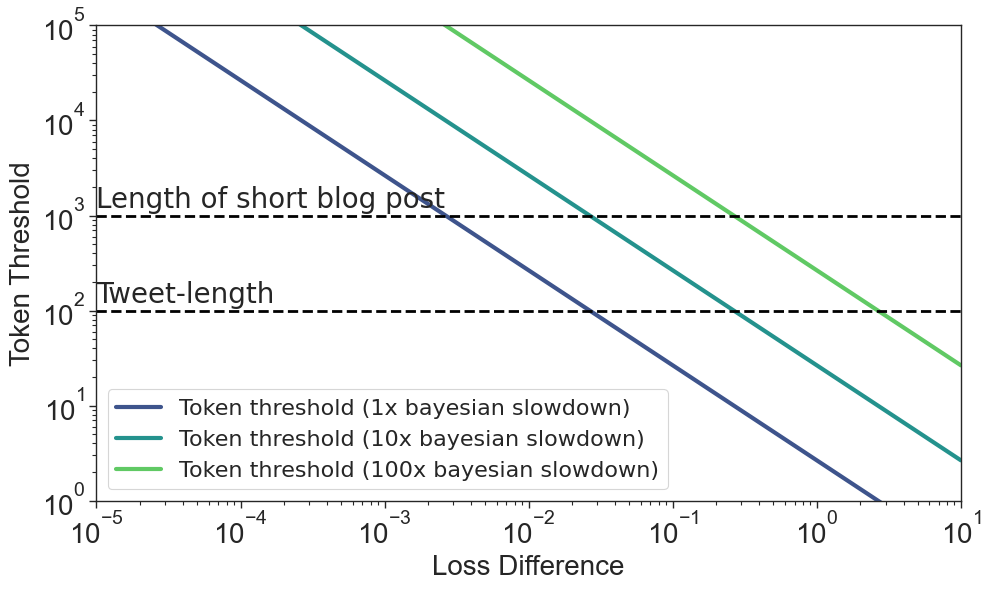

In [6]:
# comparison of loss difference and token differentation threshold 

sns.set_style("ticks")
sns.set_context("paper")
colors = sns.color_palette("viridis", n_colors=3)
discrepancy_factor = 2.65

token_threshold = lambda loss_diff: discrepancy_factor/loss_diff
loss_diffs = np.logspace(-5, 1, 100)
plt.figure(figsize=(10, 6))
plt.ylim(1e0, 1e5)
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.plot(loss_diffs, token_threshold(loss_diffs), label='Token threshold (1x bayesian slowdown)', linewidth=3, alpha=0.99, color=colors[0])
plt.plot(loss_diffs,10*token_threshold(loss_diffs), label='Token threshold (10x bayesian slowdown)', linewidth=3, alpha=0.99, color= colors[1])
plt.plot(loss_diffs,100*token_threshold(loss_diffs), label='Token threshold (100x bayesian slowdown)', linewidth=3, alpha=0.99, color=colors[2])
plt.xlabel('Loss Difference', fontsize=20)
plt.ylabel('Token Threshold', fontsize=20)
# plt.title('Token Threshold vs Loss Difference', fontsize=14, fontweight='bold')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.yscale('log')
plt.xscale('log')
plt.axhline(y=1e3, color='black', linestyle='--', linewidth=2)
plt.text(10**(-5.0), 1.2e3, 'Length of short blog post', fontsize=20)

plt.axhline(y=1e2, color='black', linestyle='--', linewidth=2)
plt.text(10**(-5.0), 1.2e2, 'Tweet-length', fontsize=20)
plt.legend(fontsize=16)
# plt.grid(True)
plt.margins(0,0)
plt.tight_layout()
plt.savefig("Figures/token_threshold_vs_loss_difference.png")
plt.show()

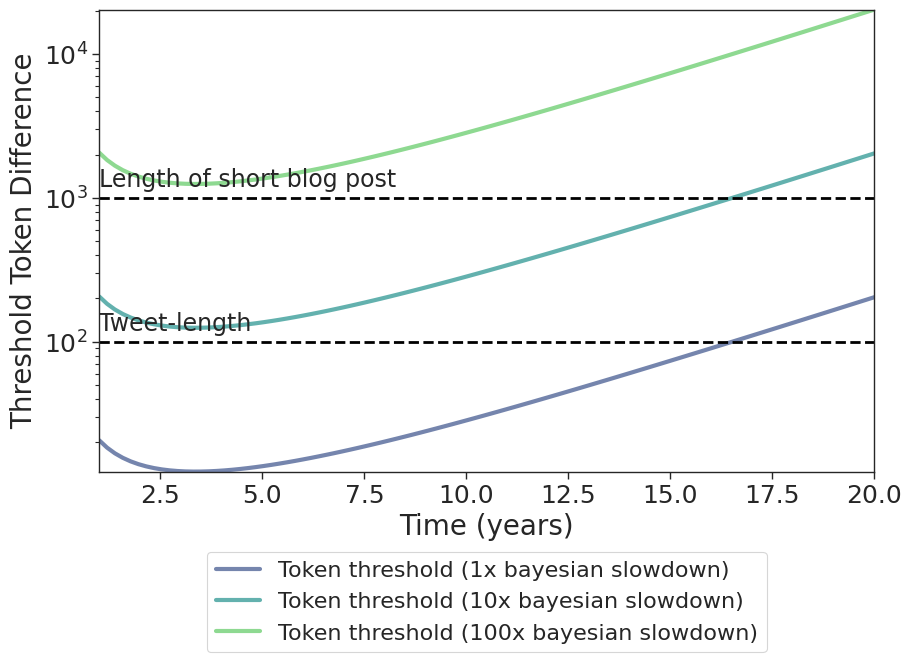

In [7]:
# now look at upper and lower bounds based on TV divergence 
# epsilon = 1e-2 # lower bound on error of hypothesis testing
dollar_to_flop = 1e17
alg_gains_train = 2.8 # improvement in algorithmic compute efficency each year
alg_gains = alg_gains_train
hardware_gains = 1.4 #increase in GPU Flops/dollar each year
sota_compute_growth = 5/hardware_gains # model compute budget grows five fold each year
inference_cost = .000143 # cost per inference in dollars
alg_gains_inf = 2.8 # improvement in algorithmic compute efficency each year for inference
# cost_per_flop_year = 0.8
start_capital = 1000
flop_year_zero = start_capital*dollar_to_flop

slowdowns = [1, 10, 100]
colors = sns.color_palette("viridis", n_colors=3)
D1 = lambda time: loss_full_function(flop_year_zero, time, investment_growth=1)-1.7
D2 = lambda time: loss_full_function(flop_year_zero, time, investment_growth=sota_compute_growth)-1.7
# upper_bound = lambda time, slowdown: slowdown*2*(1-epsilon)**2*((D1(time)/2)-(D2(time)/2))**-1
upper_bound = lambda time, slowdown: slowdown*2.65*((D1(time)-D2(time))**-1)

x = np.linspace(1, 20, 100)
plt.figure(figsize=(10, 6))
plt.rcParams['font.family'] = 'DejaVu Sans'
for i, slowdown in enumerate(slowdowns):
    y_upper = upper_bound(x, slowdown)
    plt.plot(x, y_upper, label=f"Token threshold ({slowdown}x bayesian slowdown)", linewidth=3, alpha=0.7, color=colors[i])

plt.axhline(y=1e3, color='black', linestyle='--', linewidth=2)
plt.text(1, 1.2e3, 'Length of short blog post', fontsize=17)

plt.axhline(y=1e2, color='black', linestyle='--', linewidth=2)
plt.text(1, 1.2e2, 'Tweet-length', fontsize=17)

plt.xlabel("Time (years)", fontsize=20)
plt.ylabel("Threshold Token Difference", fontsize=20)
# plt.grid(True)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.legend(fontsize=16, bbox_to_anchor=(0.5, -0.15), loc='upper center')
# plt.title("Number of Tokens Necessary to Distinguish Models for Various Slowdowns", fontsize=14, fontweight='bold')
plt.yscale('log')
plt.margins(0,0)
plt.savefig("Figures/growth_token_distinction_boundary.png", bbox_inches='tight')
